In a typical linear regression model, features might have different ranges or variances. For example, one feature might measure income in thousands of dollars while another measures age in years. If not standardized, features with larger values (like income) can disproportionately influence the model, potentially overshadowing the impact of other features

Standardizing data before using it in linear regression helps ensure that all features are on the same scale, making it easier to compare their effects and interpret the results

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
## read the dataset
read=pd.read_csv('height-weight.csv')
read.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

Text(0, 0.5, 'Weight')

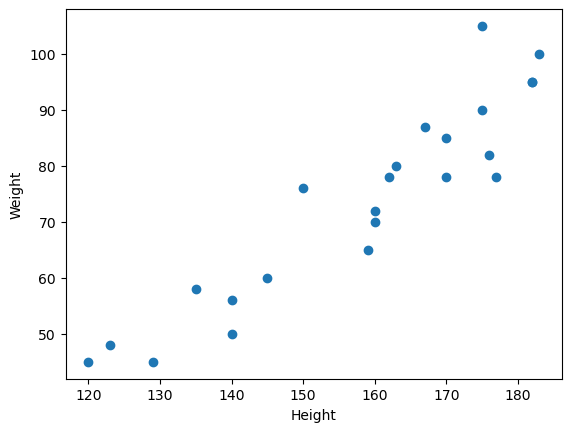

In [18]:
plt.scatter(read['Height'],read['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [20]:
## divide our dataset into independent and dependent edatures
X=read[['Weight']] ##independent feature
y=read['Height'] ##dependent feature

In [21]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

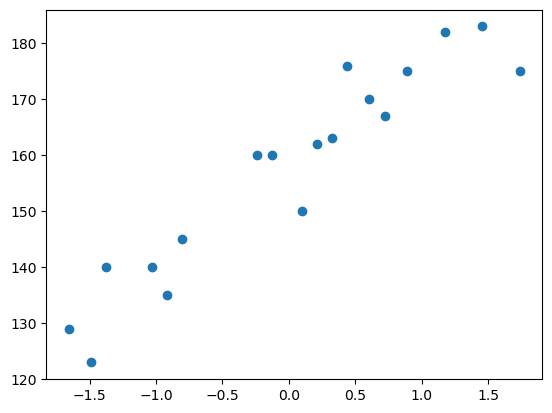

In [25]:
plt.scatter(X_train,y_train)

In [26]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


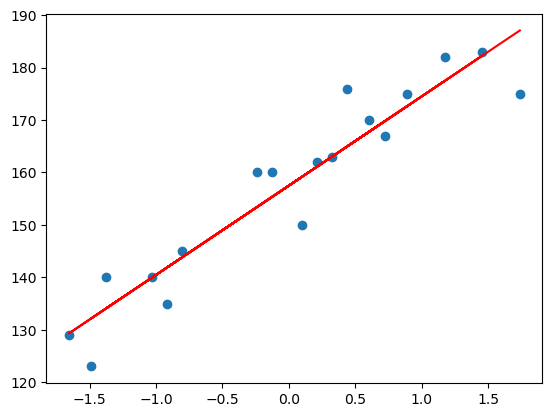

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

plt.plot(...)
This function from the Matplotlib library is used to plot lines or markers on a graph.

X_train
These are the input features used for training. For linear regression with one feature, this will be a 1D or 2D array of values on the x-axis.

regressor.predict(X_train)
This is the predicted output (target variable) from your trained regression model (regressor). It calculates the y-values corresponding to each X_train value using the learned regression equation:

ùë¶=ùë§ùëã+ùëè

You're plotting:
x-axis ‚Üí actual training input (X_train)
y-axis ‚Üí predicted outputs for those inputs (regressor.predict(X_train))

Together, this plots the fitted regression line in red.
_____________________________________________________________________________________________________________________________________________________

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [34]:
y_pred_test=regressor.predict(X_test)

In [35]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

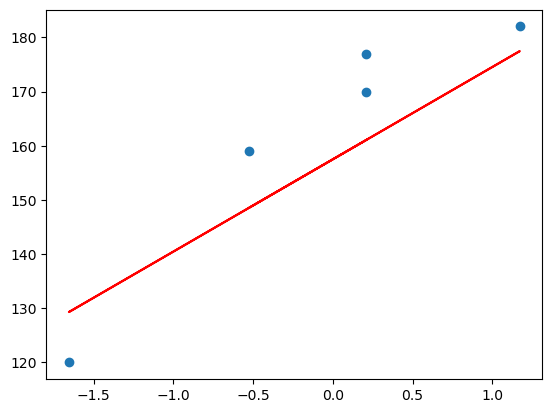

In [36]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math as math

In [38]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=math.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted R Square

**Adjusted R2 = 1 ‚Äì [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [41]:
# display adjusted R2
1-((1-score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

0.7026493147231252

In [43]:
X_test.shape[1]

1

In [44]:
scaled_weight=scaler.transform([[80]])

c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


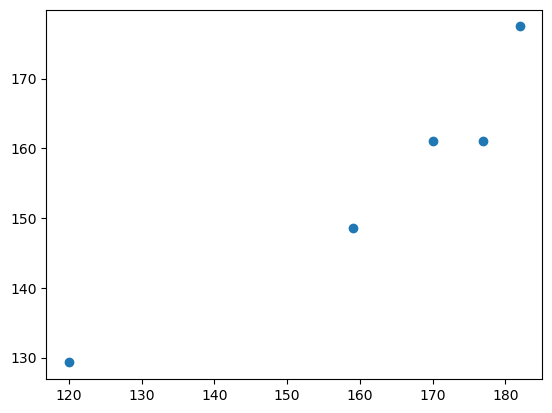

In [46]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [48]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\bhavi\AppData\Local\Temp\ipykernel_12844\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

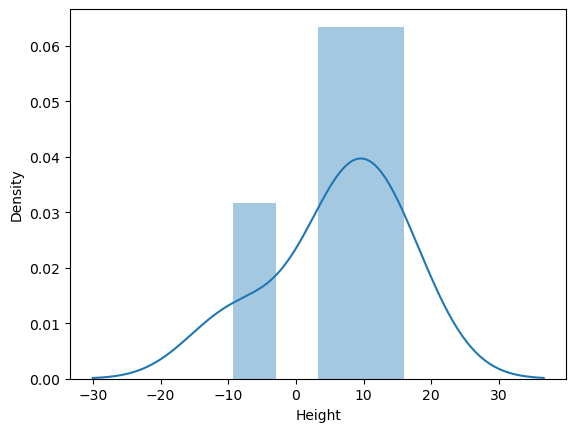

In [49]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

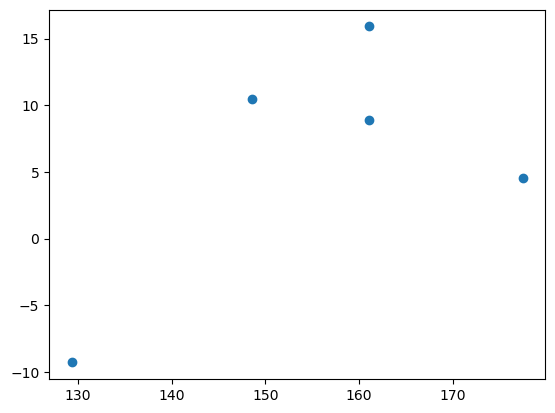

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## if this plot is randomly distributed them the model is good

In [11]:
import numpy as np
from sklearn.linear_model import ElasticNet, ElasticNetCV

X = np.array([[3, 1], [2, 5], [5, 3], [1, 4]])
beta = np.array([1, 1])
y = X @ beta ## this adds the values in the 'X' array
w = np.array([10, 1, 10, 1])

print(X)
print(beta)
print(y)
print(w)

[[3 1]
 [2 5]
 [5 3]
 [1 4]]
[1 1]
[4 7 8 5]
[10  1 10  1]
